# ANN Car Price Prediction

## Import Libraries

In [1]:
# Import Generic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Scikit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Import Tensorflow
import warnings
warnings.filterwarnings('ignore')
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization


Using TensorFlow backend.


## Import Data

In [2]:
# Import Dataset
dataset_df = pd.read_csv("car_dataset.csv", encoding='ISO-8859-1')
# Show dataset First 5 Rows
print(dataset_df.head())

     Customer Name                                    Customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        Country  Gender        Age  Annual Salary  Credit Card Debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     Net Worth  Car Purchase Amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773      

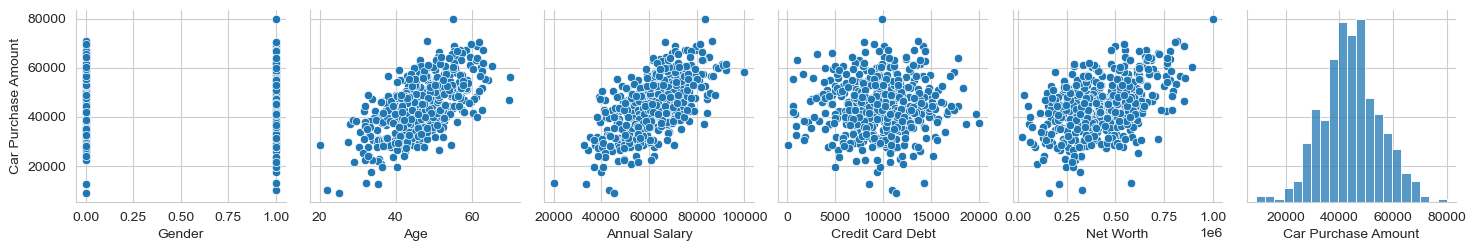

In [3]:
# Plot Pair Plot to Visualize the Data and how it relates to "Car Purchase Amount"
# This will help to understand (visually) the possible trends and relations
sns.pairplot(dataset_df, y_vars=['Car Purchase Amount'])

## Clean and Prepare Train and Test Data

In [4]:
# Independent Variables: Drop Customer Name and Customer e-mail Columns and Car Purchase Amount and Country (could be added later by coding the categorical valuable to numeric)
X = dataset_df.drop(['Customer Name','Customer e-mail','Car Purchase Amount','Country'],axis=1)
print("Remaining Columns ", X.columns.values)

# Dependent Variable: Only 'Car Purchase Amount'
Y = dataset_df['Car Purchase Amount']

# Data Normalization on Independent Variables (Batch Normalization in the ANN is also recommended)
dataScalerX = MinMaxScaler() # Scaler Object
X_scaled = dataScalerX.fit_transform(X) # Scale only on Numeric Columns (Country Not Scaled)

dataScalerY = MinMaxScaler() # Scaler Object
Y = Y.values.reshape((-1,1))
Y_scaled = dataScalerY.fit_transform(Y)



Remaining Columns  ['Gender' 'Age' 'Annual Salary' 'Credit Card Debt' 'Net Worth']


## Train Model with Prepared Data

In [5]:
# Split Input Data
#       70% - Train
#       30% - Test
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, train_size=0.7, test_size=0.3)

In [6]:
# Building ANN
model = Sequential() # Sequential Keras Object
model.add(Dense(units=5, input_dim=5, activation='relu')) # Fully Connected
model.add(BatchNormalization()) # BN
model.add(Dense(units=15, activation='relu')) # Fully Connected
# model.add(BatchNormalization()) # BN
model.add(Dense(units=1, activation='linear')) #

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
batch_normalization_1 (Batch (None, 5)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 156
Trainable params: 146
Non-trainable params: 10
_________________________________________________________________


In [7]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Fit Model to Train Data
epochs_history = model.fit(x=X_train, y=Y_train, epochs=100, batch_size=25, verbose=1, validation_split=0.2)


Train on 280 samples, validate on 70 samples
Epoch 1/100
280/280 [==============================] - 0s 865us/step - loss: 0.5650 - val_loss: 0.2442
Epoch 2/100
280/280 [==============================] - 0s 36us/step - loss: 0.3670 - val_loss: 0.1792
Epoch 3/100
280/280 [==============================] - 0s 72us/step - loss: 0.2471 - val_loss: 0.1293
Epoch 4/100
280/280 [==============================] - 0s 36us/step - loss: 0.1609 - val_loss: 0.0937
Epoch 5/100
280/280 [==============================] - 0s 72us/step - loss: 0.1130 - val_loss: 0.0710
Epoch 6/100
280/280 [==============================] - 0s 36us/step - loss: 0.0883 - val_loss: 0.0563
Epoch 7/100
280/280 [==============================] - 0s 72us/step - loss: 0.0710 - val_loss: 0.0475
Epoch 8/100
280/280 [==============================] - 0s 50us/step - loss: 0.0561 - val_loss: 0.0432
Epoch 9/100
280/280 [==============================] - 0s 57us/step - loss: 0.0532 - val_loss: 0.0406
Epoch 10/100
280/280 [=============

## Model Evaluation

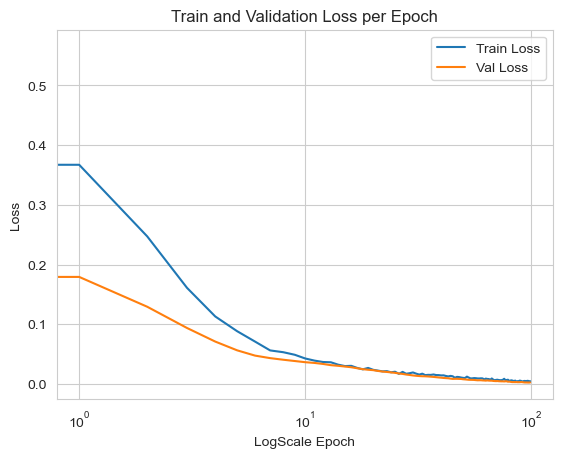

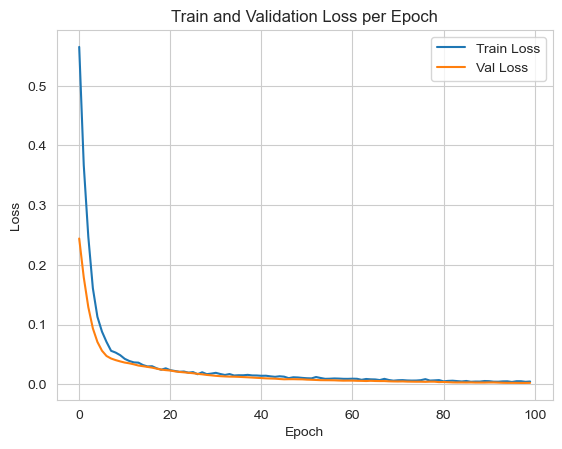

Model Evaluation 
--- Train MSE: 0.003
--- Test MSE: 0.003


In [9]:
# Plot Training Results
plt.figure()
plt.semilogx(epochs_history.history['loss'])
plt.semilogx(epochs_history.history['val_loss'])
plt.legend(['Train Loss','Val Loss'])
plt.title('Train and Validation Loss per Epoch')
plt.xlabel('LogScale Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(epochs_history.history['loss'])
plt.plot(epochs_history.history['val_loss'])
plt.legend(['Train Loss','Val Loss'])
plt.title('Train and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluate the model MSE
train_mse = model.evaluate(X_train, Y_train, verbose=0)
test_mse = model.evaluate(X_test, Y_test, verbose=0)
print('Model Evaluation \n--- Train MSE: %.3f\n--- Test MSE: %.3f' % (train_mse, test_mse))

In [10]:
# Predict with Assumed Data
Gender = 1 # Male
Age = 50
Annual_Salary = 50000
Credit_Card_Debt = 10000
Net_Worth = 600000
new_customer_data = pd.DataFrame([[Gender, Age, Annual_Salary,
                               Credit_Card_Debt, Net_Worth]], columns=['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'])
scaled_new_customer_data = dataScalerX.transform(new_customer_data)

predicted_y = model.predict(scaled_new_customer_data)
y_deScaled = dataScalerY.inverse_transform(predicted_y)

print('Suggested Price for Customer ',y_deScaled)

Suggested Price for Customer  [[45407.695]]
